## Look before you leap! A very important proverb, indeed. Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python

## Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_iris()

In [5]:
df = pd.DataFrame(data['data'])
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df['species'] = '' 

df['species'][:50] = 'setosa'
df['species'][50:100] = 'versicolor'
df['species'][100:150] = 'virginica'

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)'].values

In [7]:
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

(array([ 1.,  2.,  3.,  2.,  8.,  7.,  6., 10.,  7.,  4.]),
 array([3.  , 3.21, 3.42, 3.63, 3.84, 4.05, 4.26, 4.47, 4.68, 4.89, 5.1 ]),
 <a list of 10 Patch objects>)

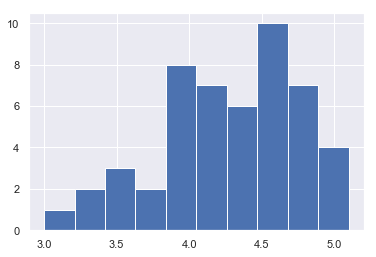

In [8]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)


## Axis labels!
In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using plt.xlabel() and plt.ylabel()

Text(0, 0.5, 'count')

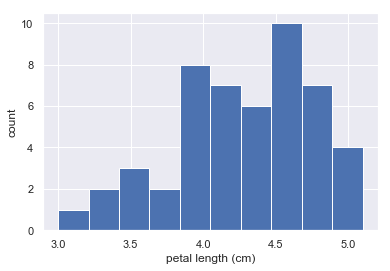

In [9]:
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')

## Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist()

Text(0, 0.5, 'count')

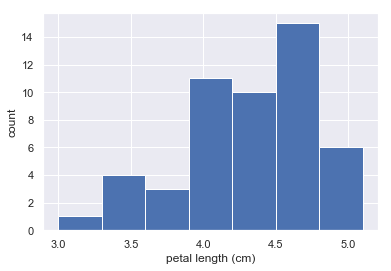

In [10]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

## Bee swarm plot
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as df.

Text(0, 0.5, 'petal length (cm)')

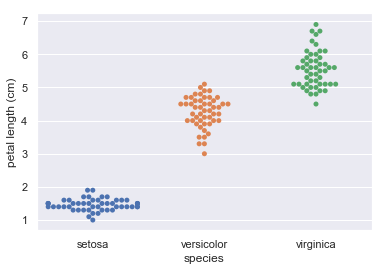

In [14]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

## Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:
```python
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```  
The function foo() above takes two arguments a and b and returns two values x and y. 

__Instructions__
- Define a function with the signature ecdf(data). Within the function definition,
  - Compute the number of data points, n, using the len() function.
  - The x-values are the sorted data. Use the np.sort() function to perform the sorting.
  - The y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to     - divide this by n.
  - The function returns the values x and y.

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Plotting the ECDF
You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

__Instructions__
- Use ecdf() to compute the ECDF of versicolor_petal_length. Unpack the output into x_vers and y_vers.
- Plot the ECDF as dots. Remember to include marker = '.' and linestyle = 'none' in addition to x_vers and y_vers as arguments inside plt.plot().
- Label the axes. You can label the y-axis 'ECDF'.
- Show your plot.

Text(0, 0.5, 'ECDF')

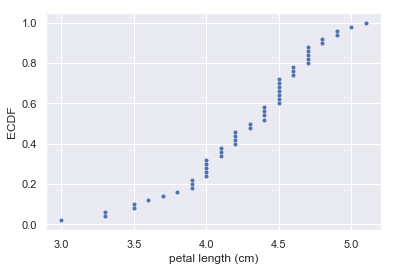

In [16]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle = 'none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

## Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().

In [18]:
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)'].values
virginica_petal_length = df[df['species'] == 'virginica']['petal length (cm)'].values

Text(0, 0.5, 'ECDF')

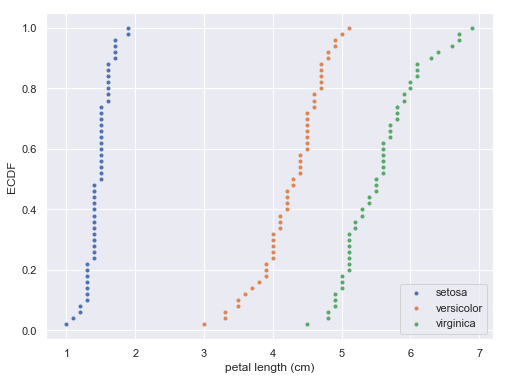

In [21]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

plt.figure(figsize = (8,6))
# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')